<a href="https://colab.research.google.com/github/FGalvao77/Modelo-preditivo-da-nota-de-matematica-ENEM-2016/blob/main/Modelo_preditivo_da_nota_de_matem%C3%A1tica_(ENEM_2016_Exame_Nacional_do_Ensino_M%C3%A9dio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo preditivo da nota de matemática (ENEM 2016)**

---



## **1) Introdução**

**Contextualizando**

> Este conjunto de dados foi baixado do INEP, um departamento do Ministério da Educação do Brasil. Ele contém dados dos candidatos ao Exame Nacional do Ensino Médio de 2016.
<br><br>
Dentro deste conjunto de dados não estão apenas os resultados dos exames, mas o contexto social e econômico dos candidatos.
<br><br>
O objetivo é explorar o conjunto de dados para obter uma melhor compreensão do contexto social e econômico dos candidatos nos resultados dos exames.

O conjunto de dados original é fornecido pelo [INEP](http://portal.inep.gov.br/microdados).

**Detalhes**

> Porém o arquivo que iremos utilizar é dos resultados do ENEM 2016 e, que está dispoinível neste link [`train.csv`](https://github.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/blob/main/datasets/train.csv).
<br><br>Qualquer dúvida a respeito das colunas, consulte o [**Dicionário dos Microdados do Enem 2016**](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).
<br><br>O desafio é descobrir quais `features` tem maior influência com a nota da prova de matemática no arquivo [`test.csv`](https://github.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/blob/main/datasets/test.csv) e, por fim criar um modelo preditivo para nota da prova de matemática **(coluna NU_NOTA_MT)**.

**Vamos para o desafio!**

## **2) Instalando e importando as bibliotecas**

Primieiro vamos instalar a biblioteca `joblib`.
> **Joblib** é um conjunto de ferramentas para fornecer pipelining leve em Python. <br>Em particular:
1. cache de disco transparente de funções e reavaliação lenta (padrão memoize)
2. computação paralela simples e fácil;
<br><br>Joblib é otimizado para ser **rápido** e **robusto** em grandes dados em particular e tem otimizações específicas para matrizes _numpy_. É **licenciado por BSD**.

- https://joblib.readthedocs.io/en/latest/

In [1]:
# instalando a biblioteca
!pip install joblib

In [2]:
# importando as bibliotecas e funções necessárias
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import *

from sklearn.linear_model import *
from sklearn.linear_model import ElasticNet

from xgboost import XGBRegressor 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.svm import SVR

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from joblib import dump, load

from warnings import filterwarnings
filterwarnings('ignore')

## **3) Importando o conjunto de dados**

In [3]:
# # realizando o carregamento do conjunto de dados para google colab
# from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
# uploaded = files.upload()

In [4]:
# instanciando os dados direto da url
train = 'https://raw.githubusercontent.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/main/datasets/train.csv'
test = 'https://raw.githubusercontent.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/main/datasets/test.csv'

In [5]:
# instanciando as features de interesse
features = ['NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP4',
            'NU_NOTA_COMP5','NU_NOTA_COMP3','NU_NOTA_REDACAO','NU_NOTA_LC',
            'NU_NOTA_CH','NU_NOTA_CN']

In [6]:
# instanciando o conjunto de dados na variável "data"
# data = pd.read_csv('https://raw.githubusercontent.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/main/datasets/train.csv', 
#                    encoding='latin-1', sep=',', 
#                    usecols=features, nrows=10000)

data = pd.read_csv(train, encoding='latin-1', sep=',', 
                   usecols=features)

## **4) Análise exploratória dos dados**

In [7]:
# visualizando as 10 primeiras linhas do conjunto de dados
data.head(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,436.3,495.4,581.2,399.4,120.0,120.0,120.0,80.0,80.0,520.0
1,474.5,544.1,599.0,459.8,140.0,120.0,120.0,120.0,80.0,580.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,439.7,583.2,410.9,364.5,120.0,120.0,120.0,160.0,100.0,620.0
6,420.1,604.2,484.5,529.2,100.0,120.0,120.0,120.0,100.0,560.0
7,619.6,625.8,611.2,566.7,140.0,120.0,120.0,120.0,120.0,620.0
8,500.5,555.2,521.8,372.4,140.0,160.0,140.0,140.0,100.0,680.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# visualizando somente a feature "NU_NOTA_MT"
data[['NU_NOTA_MT']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_NOTA_MT  10133 non-null  float64
dtypes: float64(1)
memory usage: 107.4 KB


In [9]:
# estatística descritiva
data.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,473.495155,529.661087,516.472841,482.497928,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258
std,71.093674,73.726344,68.688190,99.826323,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.900000,480.400000,468.100000,408.900000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,459.800000,532.000000,520.900000,461.200000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000
75%,514.500000,581.200000,564.900000,537.600000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,806.400000,807.000000,763.600000,952.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


In [10]:
# nome das colunas (features)
data.columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO'],
      dtype='object')

In [11]:
# instanciando as colunas na variável "features"
features = data.columns
features    # visualizando as features

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO'],
      dtype='object')

In [12]:
# instanciando a feature alvo (target)
target = 'NU_NOTA_MT'
target

'NU_NOTA_MT'

In [13]:
# contabilizando dados nulos no conjunto de dados - frequência relativa
total = data[features].isnull().sum().sort_values(ascending = False)
percent = (data[features].isnull().sum()/data[features].isnull().count()*100).sort_values(ascending = False)
missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
NU_NOTA_REDACAO,3597,26.198106
NU_NOTA_COMP5,3597,26.198106
NU_NOTA_COMP4,3597,26.198106
NU_NOTA_COMP3,3597,26.198106
NU_NOTA_COMP2,3597,26.198106
NU_NOTA_COMP1,3597,26.198106
NU_NOTA_MT,3597,26.198106
NU_NOTA_LC,3597,26.198106
NU_NOTA_CH,3389,24.683176
NU_NOTA_CN,3389,24.683176


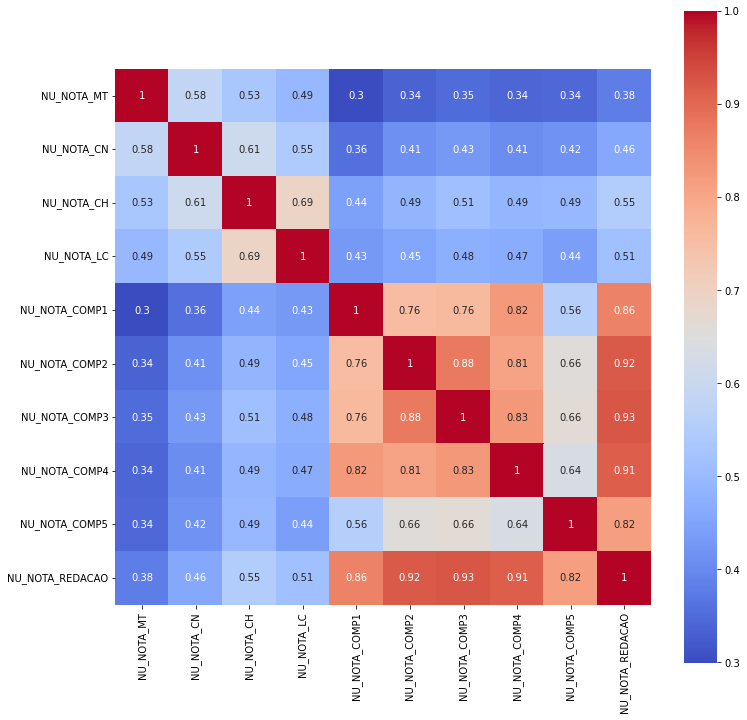

In [14]:
# plotando gráfico de calor da correlação entre as variáveis
data_map = data[[target]]

data_map[features] = data[features]
plt.figure(figsize=(12, 12))
sns.heatmap(data_map.corr(), annot=True, square=True, cmap='coolwarm')

plt.show();

<Figure size 1296x360 with 0 Axes>

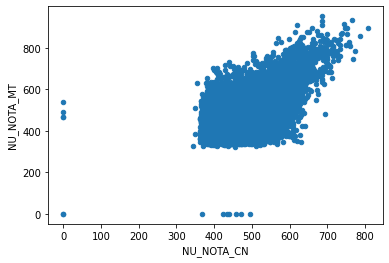

<Figure size 1296x360 with 0 Axes>

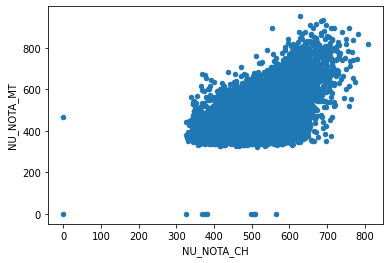

<Figure size 1296x360 with 0 Axes>

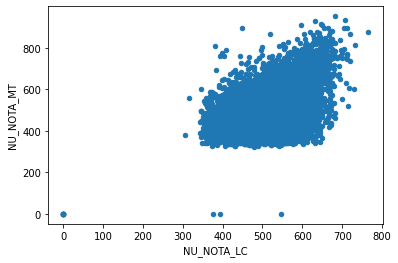

<Figure size 1296x360 with 0 Axes>

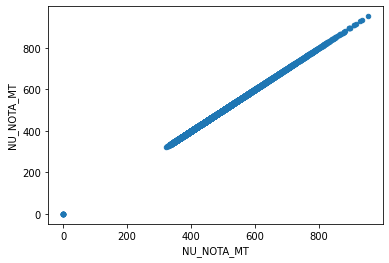

<Figure size 1296x360 with 0 Axes>

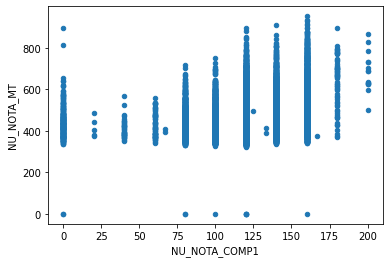

<Figure size 1296x360 with 0 Axes>

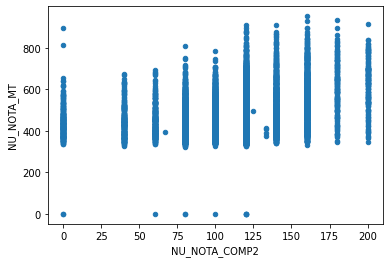

<Figure size 1296x360 with 0 Axes>

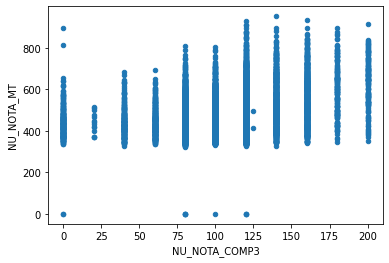

<Figure size 1296x360 with 0 Axes>

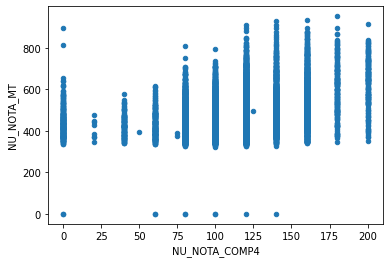

<Figure size 1296x360 with 0 Axes>

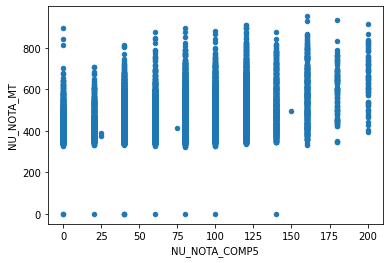

<Figure size 1296x360 with 0 Axes>

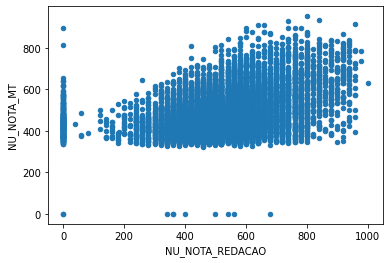

In [15]:
# plotando gráfico de dispersão entre a variável alvo (NU_NOTA_MT) VS as demais features (colunas)
for column in features:
    plt.figure(figsize = (18, 5))
    data.plot(kind='scatter', x=column, y=target)

## **5) Limpeza dos dados**

In [16]:
# visualizando se há dados duplicados
duplicated_data = data.duplicated()
data[duplicated_data]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **6) Pré-processamento dos dados**

In [17]:
# criando uma cópia do conjunto de dados para treino
# e instanciando como "train"
train = data.copy()

# instanciando as features de interesse da variável "train"
train = train.loc[:, features]

# eliminado a variável alvo dos dados de treino
train.dropna(subset=[target], inplace=True)

In [18]:
# particionando os dados em treino e teste
X = train.drop([target], axis=1)
y = train[target]

In [19]:
# instanciando as features numéricas
numerical_columns = list(X._get_numeric_data().columns)

# instanciando as features categóricas
categorical_columns = list(set(X.columns) - set(numerical_columns))

In [20]:
# instanciando um pipeline para as features numéricas
numerical_pipeline = Pipeline([
        ('data_filler', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [21]:
# instanciando um pipeline para as features categóricas
categorical_pipeline = Pipeline([
        ('data_filler', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

In [22]:
# aplicando os pipelines e, realizando a transformação das features - numéricas e categóricas
transformer = ColumnTransformer([
    ("numerical", numerical_pipeline, numerical_columns),
    ("categorical", categorical_pipeline, categorical_columns)
])

In [23]:
# particionando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 123)

In [24]:
# visualizando o tamanho das partições
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7093, 9)
(3040, 9)
(7093,)
(3040,)


## **7) Construindo os modelos**

In [25]:
# criando uma função para treinar os modelos
def train_ensemble_models(X, y):
    clf1 = LinearRegression()
    clf2 = Lasso(alpha=.5)
    clf3 = Ridge(alpha=.1)
    clf4 = LassoLars(alpha=.1)
    clf5 = AdaBoostRegressor()
    clf6 = SVR(kernel='rbf',gamma='scale',C=100)
    clf7 = GradientBoostingRegressor()

    for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7], ['Linear Regression', 'Lasso', 
                                                                       'Ridge','Lasso Lars','Ada Boost Regressor',
                                                                       'SVR', 'Gradient Boosting Regressor']):
        execute_pipeline(clf, X, y, label)

In [26]:
# criando uma função para execução do pipeline de modelos
def execute_pipeline(clf, X, y, title):
    
    pipe = Pipeline([
        ('transformer', transformer),
        ('reduce_dim', 'passthrough'),
        ('classify', clf)
    ])

    N_FEATURES_OPTIONS = [2, 4, 8]
    
    param_grid = [
        {
            'reduce_dim': [PCA()],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [SelectKBest()],
            'reduce_dim__k': N_FEATURES_OPTIONS
        },
    ]
    reducer_labels = ['PCA', 'KBest']

    grid = GridSearchCV(pipe,  param_grid=param_grid, scoring='r2', cv=10, verbose=1, n_jobs=-1, return_train_score=True)
    grid.fit(X, y)

    mean_train_scores = np.array(grid.cv_results_['mean_train_score'])
    mean_scores = np.array(grid.cv_results_['mean_test_score'])
    mean_scores = mean_scores.reshape(2, len(N_FEATURES_OPTIONS))
    bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) * (len(reducer_labels) + 1) + .5)

    plt.figure()
    COLORS = 'bgrcmyk'

    for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
        plt.bar(bar_offsets + i, mean_train_scores[i], label='{} train'.format(label),alpha=.7)
        plt.bar(bar_offsets + i, reducer_scores, label='{} test'.format(label), color=COLORS[i])

    plt.title(title)
    plt.xlabel('Number of features')
    plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
    plt.ylabel('Classification accuracy')
    plt.ylim((0, 1))
    plt.legend(loc='upper left')

    plt.show();

## **8) Avaliando os modelos**

Fitting 10 folds for each of 6 candidates, totalling 60 fits


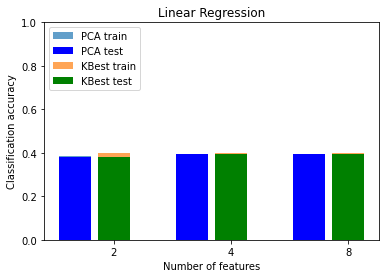

Fitting 10 folds for each of 6 candidates, totalling 60 fits


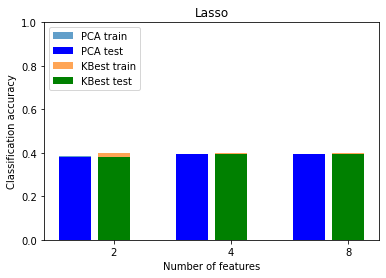

Fitting 10 folds for each of 6 candidates, totalling 60 fits


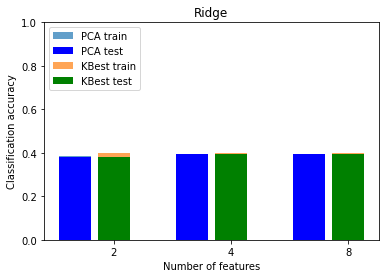

Fitting 10 folds for each of 6 candidates, totalling 60 fits


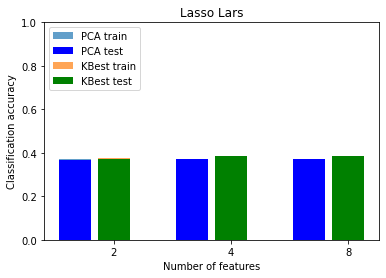

Fitting 10 folds for each of 6 candidates, totalling 60 fits


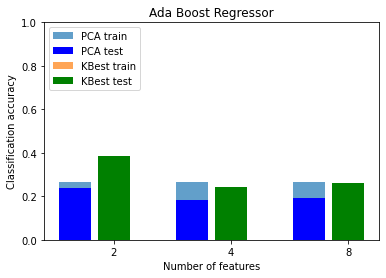

Fitting 10 folds for each of 6 candidates, totalling 60 fits


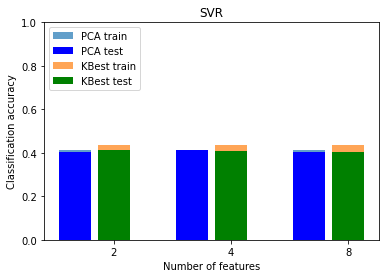

Fitting 10 folds for each of 6 candidates, totalling 60 fits


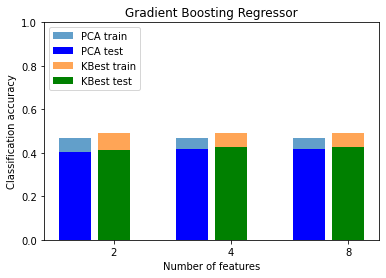

In [27]:
# aplicando a função de treino (train_ensemble_models) nos dados de treino
grid_result = train_ensemble_models(X_train, y_train)

## **9) Validando o modelo**

In [28]:
# avaliando o modelo
transformer = transformer
reduction = SelectKBest(k=8)
model = GradientBoostingRegressor()

X_train_transformer = transformer.fit_transform(X_train)
X_test_transformer = transformer.transform(X_test)

X_train_reduction_transformer = reduction.fit_transform(X_train_transformer, y_train)
X_test_reduction_transformer = reduction.transform(X_test_transformer)

model.fit(X_train_reduction_transformer, y_train)

y_predict = model.predict(X_test_reduction_transformer)

rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 75.04871916600733
R2 score is 0.46099980591043677


In [29]:
# criando um dataframe com os dados de treino e com as features mais importantes
cols = reduction.get_support(indices=True)
new_features = []

for bool, feature in zip(cols, X_train.columns):
    if bool:
        new_features.append(feature)
        
dataframe = pd.DataFrame(X_train, columns=new_features)
dataframe

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
11452,478.7,452.9,100.0,120.0,120.0,120.0,80.0
8983,680.6,585.7,120.0,120.0,140.0,120.0,140.0
12262,505.2,512.7,120.0,100.0,80.0,120.0,60.0
10290,472.7,538.4,120.0,120.0,100.0,80.0,80.0
13517,676.8,640.8,120.0,120.0,120.0,120.0,160.0
...,...,...,...,...,...,...,...
13253,438.9,539.6,0.0,0.0,0.0,0.0,0.0
10557,448.3,441.5,120.0,100.0,80.0,80.0,60.0
7073,603.0,593.0,120.0,120.0,120.0,100.0,40.0
1845,552.9,504.2,140.0,100.0,140.0,120.0,60.0


In [30]:
# instanciando os dados de treino como "target" na dataframe criado
dataframe['target'] = y_train

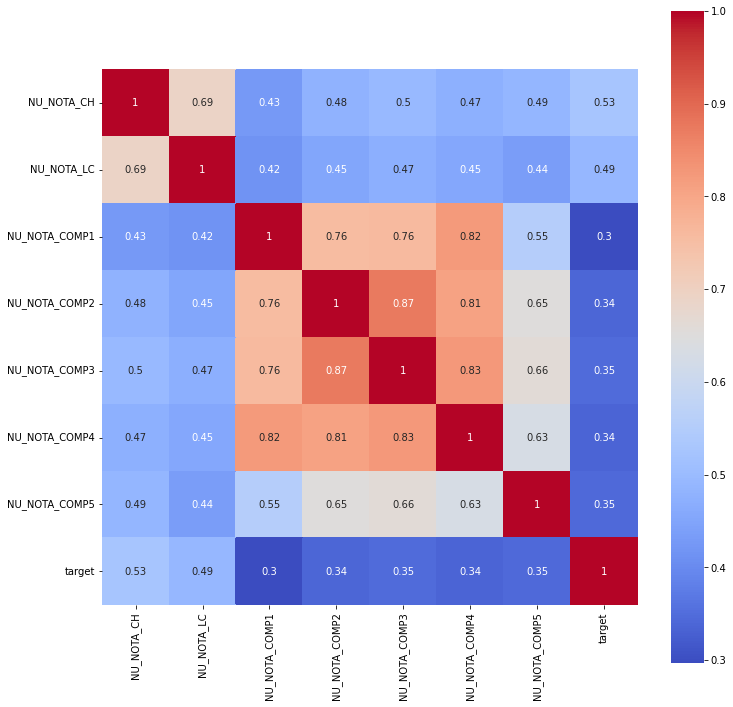

In [31]:
# visualizando a correlação entre as variáveis VS o target
plt.figure(figsize=(12, 12))
sns.heatmap(dataframe.corr(), annot=True, square=True, cmap='coolwarm')
plt.show();

## **10) Salvando o modelo e os resultados**

In [32]:
# criando um dicionário para guardar as informações do modelo
persistence = {}

persistence['transformer'] = transformer
persistence['reduction'] = reduction
persistence['model']  = model

dump(persistence, 'persist.joblib')

['persist.joblib']

In [33]:
# visualizando o dicionário
persistence

{'model': GradientBoostingRegressor(),
 'reduction': SelectKBest(k=8),
 'transformer': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('data_filler',
                                                   SimpleImputer(strategy='median')),
                                                  ('std_scaler',
                                                   StandardScaler())]),
                                  ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                                   'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
                                   'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
                                   'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']),
                                 ('categorical',
                                  Pipeline(steps=[('data_filler',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('encoder',
                    

In [34]:
# test = 'https://raw.githubusercontent.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/main/datasets/test.csv'
dataset_test = pd.read_csv(test, sep=',' , encoding='UTF8' )

In [35]:
# visualizando o dataset de teste
dataset_test

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,398.3,558.2,511.6,0,1.0,120.0,120.0,120.0,100.0,40.0,500.0,E,E,D,A,B,A,NaN,A
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.6,579.7,471.1,1,1.0,100.0,100.0,100.0,120.0,100.0,520.0,C,C,C,A,A,A,NaN,A
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,639.2,643.8,604.9,0,1.0,160.0,140.0,120.0,140.0,80.0,640.0,D,F,D,B,B,A,NaN,D
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.1,467.9,540.2,1,1.0,140.0,80.0,80.0,140.0,80.0,520.0,C,E,C,A,A,A,NaN,A


In [36]:
# carregando o dicionário de modelo
persistence = load('persist.joblib')

# instanciando os objetos para a transformação, a pré-processamento e o modelo para aplicação no dataset de teste
transformer = persistence['transformer']
reduction = persistence['reduction']
model = persistence['model']

# aplicando a transformação no dataset de teste
dataset_test_transformer = transformer.transform(dataset_test)
dataset_test_reduction_transformer = reduction.transform(dataset_test_transformer)

# realizando as predições com o dataset de  teste após as transformaçõe e seu pré-processamento
predictions = model.predict(dataset_test_reduction_transformer)

In [37]:
# visuzalizando as 20 primeiras predições
predictions[:20]

array([430.20433064, 447.90554918, 620.6359322 , 458.91106594,
       587.71663238, 467.15074834, 518.4127379 , 435.78760916,
       472.87858075, 450.74969778, 458.91106594, 458.91106594,
       456.0653152 , 589.80256448, 522.12023602, 472.23555377,
       458.91106594, 458.91106594, 458.91106594, 418.31271285])

In [38]:
# instanciando o dataframe "output" e as predições realizadas pelo modelo 
# e a coluna "NU_INSCRICAO" do dataset de teste
output = pd.DataFrame({'NU_INSCRICAO': dataset_test.NU_INSCRICAO, 
                       'NU_NOTA_MT': predictions})

In [39]:
# visualizando o dataframe criado
output

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,430.204331
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,447.905549
2,b38a03232f43b11c9d0788abaf060f7366053b6d,620.635932
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,458.911066
4,715494628a50142ce8cb17191cfe6d0f3cae0934,587.716632
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,452.770559
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,476.652067
4573,655fa6306720ff16e825903b5422a46608a77545,685.749595
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,450.020297


In [40]:
# salvando o dataframe em um arquivo "answer.csv"
output.to_csv('answer.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
